# Capstone Project ( Sentiment Analysis in AirLineTwitter )

Tweet text along with other features has been extracted from different from different sources (domain) using APIs.
Each row of the dataset contains sentiment code (negative, positive and neutral. The task is to predict whether a tweet contains positive, negative, or neutral sentiment. This is a supervised learning task where given a text string.

#### File name nomenclature
PCAM ZC321-C9-REPORT-<PROJECTNAME>-<GROUPID>   ### c9 means CAP9
PCAM ZC321-C9-CODE-<PROJECTNAME>-<GROUPID>
Eg., <PROJECTNAME> = Telecom Churn Prediction or DROUGHT PREDICTION etc.,
Eg., <GROUPID> = G5  
Here G5 stands for Group No 5 . in which you are mapped as per excel sheet and in this canvas page
Example
## PCAM ZC321-C9-CODE-Sentiment Analysis_EDA-Gr-5-Step-1

### This scripts does
1. Read the data from the Input File
2. Finding the missing values in Each Column
3. Creating the Label Columns from Tweet ID
4. Dropping rows with NULL tweets
5. Drop duplicate rows and tweet ID
6. Filling NULL tweet source and tweet by columns
7. Dropping Date Column
8. Cleaning Tweet_Source column to follow same format
9. Visualizing the data as PIE Charts
10. Visualizing the data as Word Cloud to see patterns.
11. Saving the Step 1 - Pre-Processing data to the file.

### Prerequisites/Any Spacial Python Library used

### Root folder -



### Input files location
####
 " /content/drive/My Drive/Capstone Project 9"
####  

### Output files location
#####
#####
#####
#####


In [ ]:
# Library Imports

import numpy as np
print('numpy: {}'.format(np.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import re
print('re: {}'.format(re.__version__))

import nltk
print('nltk: {}'.format(nltk.__version__))

import matplotlib.pyplot as plt

%matplotlib inline
import os, os.path

numpy: 1.25.2
pandas: 1.5.3
re: 2.2.1
nltk: 3.8.1


In [ ]:
from textblob import TextBlob

In [ ]:
import textblob
print('textblob: {}'.format(textblob.__version__))

textblob: 0.17.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Capstone Project 9

/content/drive/MyDrive/Capstone Project 9


In [ ]:
# Import my functions
import CAP9_1_AirLineTwitter_config

In [ ]:
## Define root folder
root_folder = CAP9_1_AirLineTwitter_config.RootFolder

print(root_folder)



C:/1-GG/Cap9/Airline Twitter Sentimet Analysis\Dataset


### Folder Creation through script

## Dataaset (root_folder)

#### ___  ModelSave (through script)
#### ___  OutputFiles  (through script)


In [ ]:
ModelSave  = root_folder+"\\ModelSave"
OutputFiles  = root_folder+"\OutputFiles"

CAP9_1_AirLineTwitter_config.Folder_creation(OutputFiles)
CAP9_1_AirLineTwitter_config.Folder_creation(ModelSave)


print(ModelSave)
print(OutputFiles)
InputdataFolder = root_folder
print(InputdataFolder)

C:/1-GG/Cap9/Airline Twitter Sentimet Analysis\Dataset\ModelSave
C:/1-GG/Cap9/Airline Twitter Sentimet Analysis\Dataset\OutputFiles
C:/1-GG/Cap9/Airline Twitter Sentimet Analysis\Dataset


In [ ]:
# Getting the Stop Words and Other Text Processing Libraries
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from termcolor import colored
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Data Input / Output - Folders where the input data will be read and output will be stored.

In [ ]:
# Reading the data file and storing in the dataframe tweets_original_df
tweets_original_df = pd.read_csv("/content/drive/MyDrive/Capstone Project 9/Tweets_without_label(1).csv")
print(tweets_original_df.shape)

(14640, 14)


In [ ]:
tweets_original_df.columns

Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
tweets_original_df.head(5)

,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Peek at the data
print(tweets_original_df.head(5))
print("--------------------------------")
print(tweets_original_df.dtypes)

             tweet_id  airline_sentiment_confidence negativereason  \
0  570306133677760513                        1.0000            NaN   
1  570301130888122368                        0.3486            NaN   
2  570301083672813571                        0.6837            NaN   
3  570301031407624196                        1.0000     Bad Flight   
4  570300817074462722                        1.0000     Can't Tell   

   negativereason_confidence         airline airline_sentiment_gold  \
0                        NaN  Virgin America                    NaN   
1                     0.0000  Virgin America                    NaN   
2                        NaN  Virgin America                    NaN   
3                     0.7033  Virgin America                    NaN   
4                     1.0000  Virgin America                    NaN   

         name negativereason_gold  retweet_count  \
0     cairdin                 NaN              0   
1    jnardino                 NaN              0

### 1 . Finding the missing values in each column

In [ ]:
# Function to find the missing values in each column

def find_missing_values_func(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
# Invoking the find_missing_values_func() with data frame of original tweets

columnsWiseMissingValue = find_missing_values_func(tweets_original_df)
print(columnsWiseMissingValue)

Selected dataframe has 14 columns.
There are 7 columns that have missing values.
                           Missing Values  % of Total Values
negativereason_gold                 14608               99.8
airline_sentiment_gold              14600               99.7
tweet_coord                         13621               93.0
negativereason                       5462               37.3
user_timezone                        4820               32.9
tweet_location                       4733               32.3
negativereason_confidence            4118               28.1


### 3. Drop rows which contain NULL tweets as Text Processing will be done on the tweet column

In [ ]:
# Drop NULL Tweet-Text  rows as we use tweet text for text processing
tweets_original_df = tweets_original_df.dropna(subset=["text"])

In [ ]:
print(tweets_original_df.shape)

(14640, 14)


There are no Null Tweet Text in our dataset

### 4. Drop Duplicate rows and tweet_id

In [ ]:
tweets_original_df.drop_duplicates(subset ="tweet_id", keep = False, inplace = True)

##### When considering the "first" value, it is treated as unique, while any subsequent identical values are considered duplicates.

###### If the value is designated as 'last', it is considered unique while all other identical values are classified as duplicates.

###### In case of being False, it deems every identical value as a duplicate.

In [ ]:
print(tweets_original_df.shape)

(14330, 14)


## So 14640 - 14330 = 310 - every identical value as a duplicate.

In [ ]:
#Check missing_values again , if any
columnsWiseMissingValue = find_missing_values_func(tweets_original_df)
print(columnsWiseMissingValue)

Selected dataframe has 14 columns.
There are 7 columns that have missing values.
                           Missing Values  % of Total Values
negativereason_gold                 14306               99.8
airline_sentiment_gold              14300               99.8
tweet_coord                         13335               93.1
negativereason                       5338               37.3
user_timezone                        4730               33.0
tweet_location                       4641               32.4
negativereason_confidence            4019               28.0


In [ ]:
tweets_original_df.shape

(14330, 14)

### 3. Extract the  positive , negative and neutral  sentiment from raw tweets using TextBlob

## Sentiment Analysis using TextBlob
#### TextBlob is an appealing and relatively lightweight Python 2/3 toolkit for NLP and sentiment analysis development that offers improved ease of use.TextBlob actively used Natural Language ToolKit (NLTK) to achieve its tasks. NLTK is a library which gives an easy access to a lot of lexical resources and allows users to work with categorization, classification and many other tasks. TextBlob is a simple library which supports complex analysis and operations on textual data.

##### PROCESS - 1
Find sentiment scores (polarity) and sentiment_category


###### Apart from Text Blob , there are other options  available such as   AFINN lexicon etc
https://analyticsindiamag.com/how-to-obtain-a-sentiment-score-for-a-sentence-using-textblob/

TextBlob employs a sentiment-calculating algorithm, with each word in the lexicon being rated as follows:

TextBlob, How to Obtain a Sentiment Score for a Sentence Using TextBlob?

In [ ]:
# from prompt install
# pip install -U textblob
# python -m textblob.download_corpora
from textblob import TextBlob

In [ ]:
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in tweets_original_df['text']]
sentiment_category_tb = ['positive' if score > 0
                             else 'negative' if score < 0
                                 else 'neutral'
                                     for score in sentiment_scores_tb]


# Incorporate sentiment statistics
df_correctness = pd.DataFrame([list(tweets_original_df['tweet_id']), sentiment_scores_tb, sentiment_category_tb]).T
df_correctness.columns = ['tweet_id', 'sentiment_score', 'sentiment_category']
df_correctness['sentiment_score'] = df_correctness.sentiment_score.astype('float')

#### Sentiment analysis focuses on the polarity of a text (positive, negative, neutral) but it also goes beyond polarity to detect specific feelings and emotions (angry, happy, sad, etc), urgency (urgent, not urgent) and even intentions (interested v. not interested).

In [ ]:
df_correctness.head()

,tweet_id,sentiment_score,sentiment_category
0,570306133677760513,0.000,neutral
1,570301130888122368,0.000,neutral
2,570301083672813571,-0.391,negative
3,570301031407624196,0.006,positive
4,570300817074462722,-0.350,negative


In [ ]:
df_correctness.shape

(14330, 3)

In [ ]:
#Merging tweets_df and AllclassCorrected dataframe  based on tweet_id  unique columns
merge_tweets_df = pd.merge(tweets_original_df, df_correctness, on='tweet_id')

In [ ]:
merge_tweets_df.columns

Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone', 'sentiment_score',
       'sentiment_category'],
      dtype='object')

In [ ]:
merge_tweets_df.shape

(14330, 16)

In [ ]:
print(merge_tweets_df['sentiment_category'].value_counts())

neutral     5392
positive    5343
negative    3595
Name: sentiment_category, dtype: int64


In [ ]:
#Save features and Labels data for supervised learning
merge_tweets_df.to_csv(OutputFiles+"/Step1.1_merge_tweets_df.csv", index = False)

##### Process-2
### Cleaning - This depends on organization policy

In [ ]:
# Read 04_merge_tweets_df.csv file
merge_tweets_df = pd.read_csv(OutputFiles+"/Step1.1_merge_tweets_df.csv")
print(merge_tweets_df.shape)

(14330, 16)


In [ ]:
print(merge_tweets_df['sentiment_category'].value_counts())

neutral     5392
positive    5343
negative    3595
Name: sentiment_category, dtype: int64


### Drop rows in DataFrame where sentiment_category=positive and sentiment_score < 0.09 - This varies from organization to organization

In [ ]:
filtered_weak_positive = merge_tweets_df[(merge_tweets_df.sentiment_category == 'positive') & (merge_tweets_df.sentiment_score < 0.09)]

In [ ]:
filtered_weak_positive.head()

,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment_score,sentiment_category
3,570301031407624196,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0.006,positive
17,570276917301137409,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada),0.048,positive
103,569891436100874241,0.6925,Late Flight,0.3521,Virgin America,NaN,mrmichaellay,NaN,0,@virginamerica how's a direct flight FLL-&gt;S...,"[0.0, 0.0]",2015-02-23 08:08:01 -0800,Floridian from Cincinnati,Eastern Time (US & Canada),0.067,positive
145,569609971383586817,1.0000,Cancelled Flight,1.0000,Virgin America,NaN,mlorenzen,NaN,0,@VirginAmerica I paid the premium to fly you a...,NaN,2015-02-22 13:29:34 -0800,"iPhone: 29.741360,-90.131523",Pacific Time (US & Canada),0.013,positive
164,569540405676654592,0.6800,Customer Service Issue,0.3500,Virgin America,NaN,jonesbasf,NaN,0,@VirginAmerica - Your site seems a little wonk...,NaN,2015-02-22 08:53:08 -0800,NaN,NaN,0.049,positive


### Remove rows from a data frame (merge_tweets_df)  that are identical (tweet_id)  to filtered_week_positive

In [ ]:
filtered_weak_positive.shape

(524, 16)

In [ ]:
cond = merge_tweets_df['tweet_id'].isin(filtered_weak_positive['tweet_id'])
merge_tweets_df.drop(merge_tweets_df[cond].index, inplace = True)

In [ ]:
print(merge_tweets_df['sentiment_category'].value_counts())

neutral     5392
positive    4819
negative    3595
Name: sentiment_category, dtype: int64


In [ ]:
merge_tweets_df.shape

(13806, 16)

# 14330 - 13806 = 524


In [ ]:
merge_tweets_df.dtypes

tweet_id                          int64
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
sentiment_score                 float64
sentiment_category               object
dtype: object

In [ ]:
#Check missing_values again , if any
columnsWiseMissingValue = find_missing_values_func(merge_tweets_df)
print(columnsWiseMissingValue)

Selected dataframe has 16 columns.
There are 7 columns that have missing values.
                           Missing Values  % of Total Values
negativereason_gold                 13783               99.8
airline_sentiment_gold              13777               99.8
tweet_coord                         12854               93.1
negativereason                       5205               37.7
user_timezone                        4559               33.0
tweet_location                       4455               32.3
negativereason_confidence            3924               28.4


# Convert sentiment_category to numeric class for machine learning

In [ ]:
# Create the dictionary
class_dictionary = {'neutral' : 2, 'positive' : 0, 'negative' : 1}

# Add a new column named 'class'
merge_tweets_df['class'] = merge_tweets_df['sentiment_category'].map(class_dictionary)

In [ ]:
print(merge_tweets_df['class'].value_counts())

2    5392
0    4819
1    3595
Name: class, dtype: int64


In [ ]:
# Configuring the Plot Sizes
plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

6.4
4.8


# Visualizing the Data

## Label distribution - Positive, Negative, & Neutral

In [ ]:
# Check label_id
merge_tweets_df["class"].value_counts()

2    5392
0    4819
1    3595
Name: class, dtype: int64

Text(0.5, 1.0, 'Figure 1.2 - Count of tweets for each sentiment')

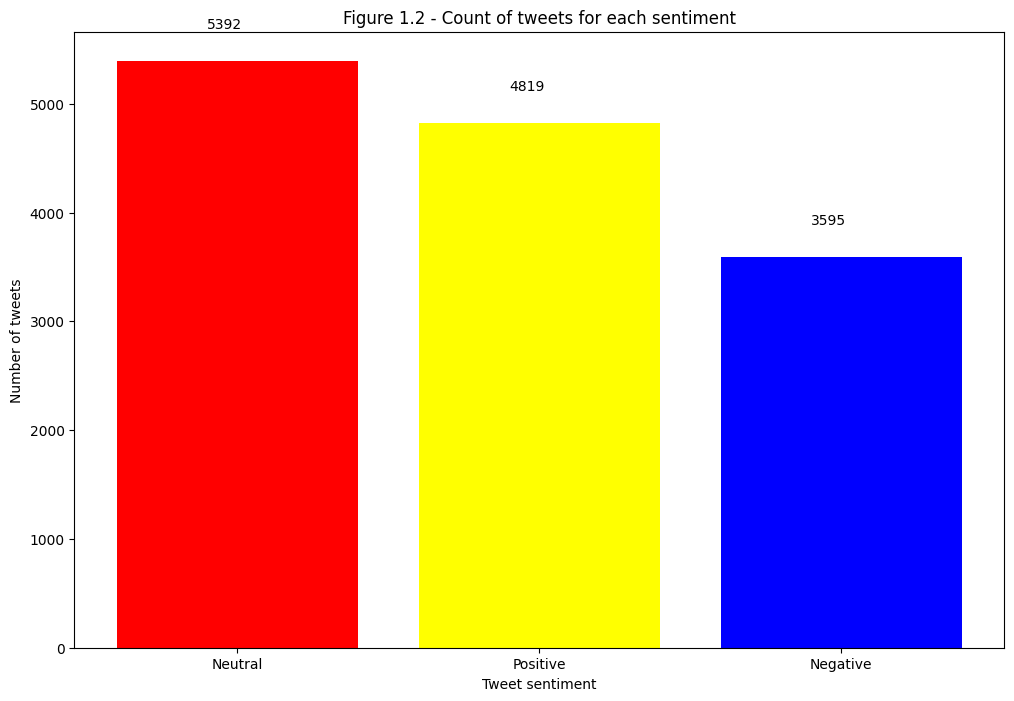

In [ ]:
# Graph with distribution of sentiments
class_count = merge_tweets_df['class'].value_counts()

plt.figure(figsize = (12, 8))
plt.bar(['Neutral' , 'Positive' , 'Negative'], height = class_count.values, color = ["red", "yellow", "blue"])
for i, v in enumerate(class_count.values):
    plt.text(i - 0.1, v+300 , str(v))

plt.xlabel('Tweet sentiment')
plt.ylabel('Number of tweets')
plt.title('Figure 1.2 - Count of tweets for each sentiment')

<Axes: title={'center': 'Figure 4.1 - Distribution of Sentiments'}, ylabel='class'>

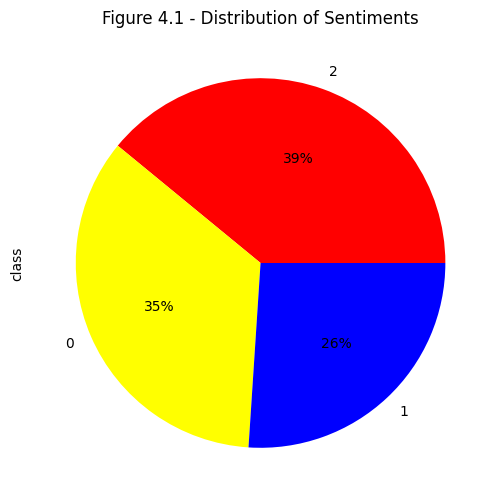

In [ ]:
merge_tweets_df["class"].value_counts().plot(title='Figure 4.1 - Distribution of Sentiments', kind='pie', autopct='%1.0f%%', colors=[["red", "yellow", "blue"]])

In [ ]:
#Save processed features and Labels data for supervised learning
merge_tweets_df.to_csv(OutputFiles+"/Step1.1.2_merge_tweets_df.csv", index = False)

#  ----End of step 1----